In [1]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [2]:
# display matplotlib graphics in notebook
%matplotlib inline

In [3]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_112"; Java(TM) SE Runtime Environment (build 1.8.0_112-b16); Java HotSpot(TM) 64-Bit Server VM (build 25.112-b16, mixed mode)
  Starting server from /Users/phall/anaconda/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp36ax9t8t
  JVM stdout: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp36ax9t8t/h2o_phall_started_from_python.out
  JVM stderr: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp36ax9t8t/h2o_phall_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.10.3.4
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_phall_ng41lb
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [4]:
# location of "dirty" file
# decision trees handle dirty data elegantly
path = '/Users/phall/workspace/GWU_data_mining/02_analytical_data_prep/data/loan.csv'

In [5]:
# define input variable measurement levels 
# strings automatically parsed as enums (nominal)
# numbers automatically parsed as numeric
col_types = {'bad_loan': 'enum'}

In [6]:
frame = h2o.import_file(path=path, col_types=col_types) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
frame.describe()

Rows:163987
Cols:16




,id,bad_loan,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,longest_credit_length,verification_status,term_length
type,int,enum,int,real,int,enum,real,enum,enum,real,int,real,int,int,enum,int
mins,10001.0,,500.0,5.42,0.0,,1896.0,,,0.0,0.0,0.0,1.0,0.0,,36.0
mean,91994.0,,13073.209220415742,13.717143207254315,5.686200649105202,,71931.19588595249,,,15.880794152061497,0.22746713629788037,54.07622244747627,24.577910646698616,14.8582097058084,,40.980679245283056
maxs,173987.0,,35000.0,26.060000000000002,10.0,,7141778.0,,,39.93,29.0,150.70000000000002,118.0,65.0,,60.0
sigma,47339.11363414683,,7992.3993793601785,4.3935679462170425,3.610039811481059,,59464.026648950334,,,7.583636421364416,0.6949139713078192,25.284135504932134,11.685003948632696,6.949793041523766,,9.732920010298912
zeros,0,,0,0,13810,,0,,,263,135210,1515,0,11,,0
missing,0,0,4992,4854,10545,2571,4983,2488,2484,5025,4997,5154,4933,4907,2426,4987
0,10001.0,0,5000.0,10.65,10.0,RENT,24000.0,credit_card,AZ,27.650000000000002,0.0,83.7,9.0,26.0,verified,36.0
1,10002.0,1,2500.0,15.27,0.0,RENT,30000.0,car,GA,1.0,0.0,9.4,4.0,12.0,verified,60.0
2,10003.0,0,2400.0,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,10.0,not verified,36.0


In [8]:
# correct MORTGAGE/mortgage problem using gsub() and trim() functions
print(frame['home_ownership'].table())

frame['home_ownership'] = frame['home_ownership'].gsub(pattern='mortgage',
                                                       replacement='MORTGAGE')
frame['home_ownership'] = frame['home_ownership'].trim()

print(frame['home_ownership'].table())

home_ownership,Count
ANY,1
MORTGAGE,74209
NONE,30
OTHER,151
OWN,13369
RENT,69416
mortgage,4240


home_ownership,Count
ANY,1
MORTGAGE,78449
NONE,30
OTHER,151
OWN,13369
RENT,69416


In [9]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [10]:
# assign target and inputs
y = 'bad_loan'
X = [name for name in frame.columns if name not in ['id', '_WARN_', y]]
print(y)
print(X)

bad_loan
['loan_amnt', 'int_rate', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length', 'verification_status', 'term_length']


In [11]:
# set target to factor - for binary classification
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()
test[y] = test[y].asfactor()

In [12]:
# random forest

# initialize rf model
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model')             # for easy lookup in flow

# train rf model
rf_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

# view detailed results at http://localhost:54321/flow/index.html

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.15008196462465218
RMSE: 0.38740413604484425
LogLoss: 0.5217844630452985
Mean Per-Class Error: 0.38939540158294705
AUC: 0.6509076108229661
Gini: 0.3018152216459322
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19444142153671448: 


,0,1,Error,Rate
0,30952.0,22028.0,0.4158,(22028.0/52980.0)
1,4567.0,8012.0,0.3631,(4567.0/12579.0)
Total,35519.0,30040.0,0.4057,(26595.0/65559.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1944414,0.3759825,249.0
max f2,0.0909115,0.5537167,337.0
max f0point5,0.2941175,0.3279110,174.0
max accuracy,0.75,0.8082186,7.0
max precision,0.9142857,1.0,0.0
max recall,0.0000034,1.0,399.0
max specificity,0.9142857,1.0,0.0
max absolute_mcc,0.2517223,0.1790049,204.0
max min_per_class_accuracy,0.2038103,0.6100415,241.0
max mean_per_class_accuracy,0.1952781,0.6106046,248.0


Gains/Lift Table: Avg response rate: 19.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100063,0.8216846,5.2117815,5.2117815,1.0,1.0,0.0521504,0.0521504,421.1781541,421.1781541
,2,0.0222853,0.7956989,5.2117815,5.2117815,1.0,1.0,0.0639955,0.1161460,421.1781541,421.1781541
,3,0.0300035,0.7832445,5.2117815,5.2117815,1.0,1.0,0.0402258,0.1563717,421.1781541,421.1781541
,4,0.0407572,0.7688172,5.2117815,5.2117815,1.0,1.0,0.0560458,0.2124175,421.1781541,421.1781541
,5,0.0500008,0.7579314,5.2117815,5.2117815,1.0,1.0,0.0481755,0.2605931,421.1781541,421.1781541
,6,0.1021065,0.7096774,5.2117815,5.2117815,1.0,1.0,0.2715637,0.5321568,421.1781541,421.1781541
,7,0.1500023,0.6577090,5.2117815,5.2117815,1.0,1.0,0.2496224,0.7817792,421.1781541,421.1781541
,8,0.2000031,0.2091261,4.3643503,4.9999237,0.8374009,0.9593502,0.2182208,1.0,336.4350314,399.9923734
,9,0.3022011,0.1290323,0.0,3.3090551,0.0,0.6349182,0.0,1.0,-100.0,230.9055118
,10,0.4000061,0.0995629,0.0,2.4999619,0.0,0.4796751,0.0,1.0,-100.0,149.9961867




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.14800955439394606
RMSE: 0.38472009876525304
LogLoss: 0.4692500851402505
Mean Per-Class Error: 0.37763587138195276
AUC: 0.6661927336099165
Gini: 0.332385467219833
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20970937559261782: 


,0,1,Error,Rate
0,25048.0,14672.0,0.3694,(14672.0/39720.0)
1,3691.0,5874.0,0.3859,(3691.0/9565.0)
Total,28739.0,20546.0,0.3726,(18363.0/49285.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2097094,0.3901564,231.0
max f2,0.0987689,0.5603620,334.0
max f0point5,0.3118301,0.3525965,150.0
max accuracy,0.5484298,0.8063305,36.0
max precision,0.7772103,1.0,0.0
max recall,0.0000639,1.0,399.0
max specificity,0.7772103,1.0,0.0
max absolute_mcc,0.2539283,0.1984435,194.0
max min_per_class_accuracy,0.2053653,0.6208050,235.0
max mean_per_class_accuracy,0.2097094,0.6223641,231.0


Gains/Lift Table: Avg response rate: 19.41 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105509,0.5268817,2.5565021,2.5565021,0.4961538,0.4961538,0.0269733,0.0269733,155.6502071,155.6502071
,2,0.0208177,0.4838710,2.4643060,2.5110331,0.4782609,0.4873294,0.0253006,0.0522739,146.4306007,151.1033057
,3,0.0300091,0.4564181,2.0701555,2.3759975,0.4017660,0.4611224,0.0190277,0.0713016,107.0155518,137.5997543
,4,0.0400122,0.4404340,1.9021916,2.2575461,0.3691684,0.4381339,0.0190277,0.0903293,90.2191581,125.7546052
,5,0.0526124,0.4193548,2.0328450,2.2037322,0.3945250,0.4276899,0.0256142,0.1159435,103.2845023,120.3732192
,6,0.1000101,0.3639939,1.8329810,2.0280222,0.3557363,0.3935890,0.0868792,0.2028228,83.2981036,102.8022170
,7,0.1500051,0.3239188,1.6603880,1.9054940,0.3222403,0.3698093,0.0830110,0.2858338,66.0387998,90.5494022
,8,0.2,0.2974948,1.4429064,1.7898589,0.2800325,0.3473674,0.0721380,0.3579718,44.2906447,78.9858860
,9,0.3000304,0.2513441,1.2677793,1.6157970,0.2460446,0.3135863,0.1268165,0.4847883,26.7779334,61.5797045
,10,0.4066755,0.2150538,1.0940537,1.4789770,0.2123288,0.2870329,0.1166754,0.6014637,9.4053663,47.8977047



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-02-27 12:41:43,0.019 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2017-02-27 12:41:44,0.959 sec,1.0,0.5353232,9.7462162,0.5374236,3.7348104,0.8087955,0.5341060,9.6727932,0.5428603,1.3321620,0.8059247
,2017-02-27 12:41:45,1.874 sec,2.0,0.5243161,8.8385221,0.5382699,4.9606879,0.8089278,0.4666486,5.0362726,0.5628392,1.4972057,0.8059247
,2017-02-27 12:41:46,2.319 sec,3.0,0.5094344,7.8032951,0.5402392,5.1743456,0.8085520,0.4406904,3.3582733,0.5750762,1.7362920,0.4451659
,2017-02-27 12:41:46,2.921 sec,4.0,0.4955465,6.8875273,0.5449216,5.2052525,0.8084696,0.4279224,2.5731176,0.5834997,1.6518889,0.4933550
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2017-02-27 12:44:01,2 min 17.285 sec,89.0,0.3876717,0.5271640,0.6498219,5.2117815,0.3870254,0.3848433,0.4695768,0.6655795,2.5713367,0.3937912
,2017-02-27 12:44:03,2 min 20.124 sec,90.0,0.3875821,0.5259789,0.6501917,5.2117815,0.4268064,0.3848223,0.4695374,0.6655884,2.6024489,0.3840114
,2017-02-27 12:44:06,2 min 23.003 sec,91.0,0.3874815,0.5252495,0.6507227,5.2117815,0.4416937,0.3847999,0.4695024,0.6656419,2.5813420,0.3853099
,2017-02-27 12:44:09,2 min 26.009 sec,92.0,0.3874664,0.5242858,0.6506648,5.2117815,0.4260437,0.3847674,0.4694148,0.6658237,2.6129005,0.3855534



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
addr_state,101436.4609375,1.0,0.1732309
int_rate,67842.8437500,0.6688211,0.1158605
dti,55478.2812500,0.5469264,0.0947445
revol_util,54344.5820312,0.5357500,0.0928084
loan_amnt,49488.5781250,0.4878776,0.0845155
total_acc,47983.6445312,0.4730414,0.0819454
longest_credit_length,45768.0195312,0.4511989,0.0781616
annual_inc,44177.9375000,0.4355233,0.0754461
emp_length,37370.6406250,0.3684143,0.0638207
purpose,34664.8203125,0.3417393,0.0591998


In [13]:
# measure rf AUC
print(rf_model.auc(train=True))
print(rf_model.auc(valid=True))
print(rf_model.model_performance(test_data=test).auc())

0.6509076108229661
0.6661927336099165
0.6721963701536513


In [14]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

# view detailed results at http://localhost:54321/flow/index.html

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [15]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.2         6     50         0.9   
1                0.2         2    450         0.2   
2                0.1         8     50         0.8   
3                0.3         8    100         0.7   
4                0.1        16     50         0.3   
5                0.5         4    450         0.2   
6                0.4        12     50         0.6   
7                0.2        10    300         0.6   
8                0.7        10    100         0.4   
9                0.3         2      0         0.1   
10               0.6         8    200         0.3   
11               0.8         6    350         0.1   
12               0.6        12    150         0.7   
13               0.4        16    100         0.6   
14               0.4        12    300         0.3   
15               0.7        12    400         0.5   
16               0.4        18    350         0.4   
17               0.9        18    300         

,0,1,Error,Rate
0,39603.0,13377.0,0.2525,(13377.0/52980.0)
1,5204.0,7375.0,0.4137,(5204.0/12579.0)
Total,44807.0,20752.0,0.2834,(18581.0/65559.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2204788,0.4425310,216.0
max f2,0.1403280,0.5907453,300.0
max f0point5,0.3140680,0.4342097,140.0
max accuracy,0.4185894,0.8172028,76.0
max precision,0.7347896,1.0,0.0
max recall,0.0396191,1.0,398.0
max specificity,0.7347896,1.0,0.0
max absolute_mcc,0.2552369,0.2905422,186.0
max min_per_class_accuracy,0.1959668,0.6711185,241.0
max mean_per_class_accuracy,0.1916968,0.6725256,245.0


Gains/Lift Table: Avg response rate: 19.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100063,0.4995701,3.9326705,3.9326705,0.7545732,0.7545732,0.0393513,0.0393513,293.2670522,293.2670522
,2,0.0200125,0.4569577,3.0984677,3.5155691,0.5945122,0.6745427,0.0310041,0.0703554,209.8467684,251.5569103
,3,0.0300035,0.4311187,2.9281460,3.3199605,0.5618321,0.6370107,0.0292551,0.0996105,192.8145965,231.9960483
,4,0.0400098,0.4104516,2.7409522,3.1751532,0.5259146,0.6092261,0.0274267,0.1270371,174.0952182,217.5153222
,5,0.0500008,0.3936433,2.5462139,3.0494805,0.4885496,0.5851129,0.0254392,0.1524763,154.6213882,204.9480474
,6,0.1000015,0.3363740,2.2099989,2.6297397,0.4240390,0.5045760,0.1105016,0.2629780,120.9998884,162.9739679
,7,0.1500023,0.2987249,1.8665746,2.3753513,0.3581452,0.4557657,0.0933302,0.3563081,86.6574597,137.5351318
,8,0.2000031,0.2691903,1.6249057,2.1877399,0.3117755,0.4197682,0.0812465,0.4375547,62.4905654,118.7739902
,9,0.3000046,0.2256031,1.2830713,1.8861837,0.2461867,0.3619077,0.1283091,0.5658637,28.3071294,88.6183700
,10,0.4000061,0.1937510,1.1193088,1.6944650,0.2147651,0.3251220,0.1119326,0.6777963,11.9308787,69.4464972




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.14543871178455503
RMSE: 0.3813642770168111
LogLoss: 0.45804457282963496
Mean Per-Class Error: 0.36413860694490285
AUC: 0.6843310978732992
Gini: 0.3686621957465983
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19016822293491922: 


,0,1,Error,Rate
0,25298.0,14422.0,0.3631,(14422.0/39720.0)
1,3493.0,6072.0,0.3652,(3493.0/9565.0)
Total,28791.0,20494.0,0.3635,(17915.0/49285.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1901682,0.4040055,245.0
max f2,0.1135704,0.5676947,330.0
max f0point5,0.2911818,0.3678569,155.0
max accuracy,0.5309612,0.8070813,27.0
max precision,0.7096908,1.0,0.0
max recall,0.0384904,1.0,398.0
max specificity,0.7096908,1.0,0.0
max absolute_mcc,0.2220886,0.2214097,214.0
max min_per_class_accuracy,0.1901682,0.6348144,245.0
max mean_per_class_accuracy,0.1901682,0.6358614,245.0


Gains/Lift Table: Avg response rate: 19.41 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100030,0.4930126,2.7069649,2.7069649,0.5253550,0.5253550,0.0270779,0.0270779,170.6964943,170.6964943
,2,0.0200061,0.4548047,2.4038685,2.5554167,0.4665314,0.4959432,0.0240460,0.0511239,140.3868482,155.5416712
,3,0.0300091,0.4284177,2.3307073,2.4805136,0.4523327,0.4814064,0.0233142,0.0744381,133.0707267,148.0513564
,4,0.0400122,0.4092203,2.2052880,2.4117072,0.4279919,0.4680527,0.0220596,0.0964976,120.5288042,141.1707183
,5,0.0500152,0.3925269,2.0903204,2.3474298,0.4056795,0.4555781,0.0209096,0.1174072,109.0320419,134.7429830
,6,0.1000101,0.3354178,1.9050547,2.1262872,0.3697240,0.4126598,0.0952431,0.2126503,90.5054743,112.6287162
,7,0.1500051,0.2982106,1.7314877,1.9947052,0.3360390,0.3871230,0.0865656,0.2992159,73.1487736,99.4705154
,8,0.2,0.2691618,1.4868210,1.8677470,0.2885552,0.3624835,0.0743335,0.3735494,48.6820991,86.7746994
,9,0.3000101,0.2259776,1.3067153,1.6807238,0.2536011,0.3261869,0.1306848,0.5042342,30.6715316,68.0723787
,10,0.4,0.1940868,1.1240032,1.5415578,0.2181412,0.2991782,0.1123889,0.6166231,12.4003210,54.1557763



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-02-27 12:47:35,3 min 14.590 sec,0.0,0.3937737,0.4889274,0.5,1.0,0.8081270,0.3954933,0.4920941,0.5,1.0,0.8059247
,2017-02-27 12:47:35,3 min 14.627 sec,1.0,0.3916024,0.4835146,0.6653552,2.4206787,0.3779649,0.3935176,0.4871412,0.6517274,2.1275416,0.3905651
,2017-02-27 12:47:35,3 min 14.681 sec,2.0,0.3901881,0.4800639,0.6726391,2.6999178,0.3652130,0.3922456,0.4840128,0.6590266,2.1216752,0.4030638
,2017-02-27 12:47:35,3 min 14.781 sec,3.0,0.3885664,0.4761571,0.6805070,2.8839584,0.3635199,0.3908296,0.4805754,0.6654850,2.5142399,0.3900375
,2017-02-27 12:47:35,3 min 14.966 sec,4.0,0.3871208,0.4727631,0.6882161,3.0573673,0.3480071,0.3897118,0.4779258,0.6692780,2.4253637,0.3353150
,2017-02-27 12:47:36,3 min 15.181 sec,5.0,0.3859309,0.4699486,0.6909097,3.1461364,0.3410058,0.3886844,0.4754629,0.6722096,2.4143201,0.3623009
,2017-02-27 12:47:36,3 min 15.421 sec,6.0,0.3849105,0.4676001,0.6950726,3.2029917,0.3313809,0.3879776,0.4738181,0.6734224,2.4352233,0.3672517
,2017-02-27 12:47:36,3 min 15.668 sec,7.0,0.3840531,0.4656352,0.6982147,3.1933003,0.3212831,0.3873994,0.4724824,0.6740751,2.5815457,0.3575936
,2017-02-27 12:47:36,3 min 15.932 sec,8.0,0.3832543,0.4637554,0.6999292,3.1699708,0.3287115,0.3868378,0.4711359,0.6744395,2.5710941,0.3822055
,2017-02-27 12:47:37,3 min 16.200 sec,9.0,0.3824771,0.4619649,0.6999187,3.2017499,0.3318080,0.3862541,0.4697353,0.6748868,2.5710941,0.3448514


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
int_rate,1617.3602295,1.0,0.2902054
addr_state,890.4176025,0.5505376,0.1597690
term_length,717.4395752,0.4435868,0.1287313
dti,416.3591309,0.2574313,0.0747080
annual_inc,405.8403015,0.2509276,0.0728205
purpose,324.7966003,0.2008190,0.0582787
revol_util,306.1564941,0.1892939,0.0549341
loan_amnt,227.7232819,0.1407994,0.0408607
total_acc,185.5734711,0.1147385,0.0332977
home_ownership,134.8183136,0.0833570,0.0241907


In [16]:
# measure gbm AUC
print(gbm_model.auc(train=True))
print(gbm_model.auc(valid=True))
print(gbm_model.model_performance(test_data=test).auc())

0.7363414034926296
0.6843310978732992
0.6834812769169255


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


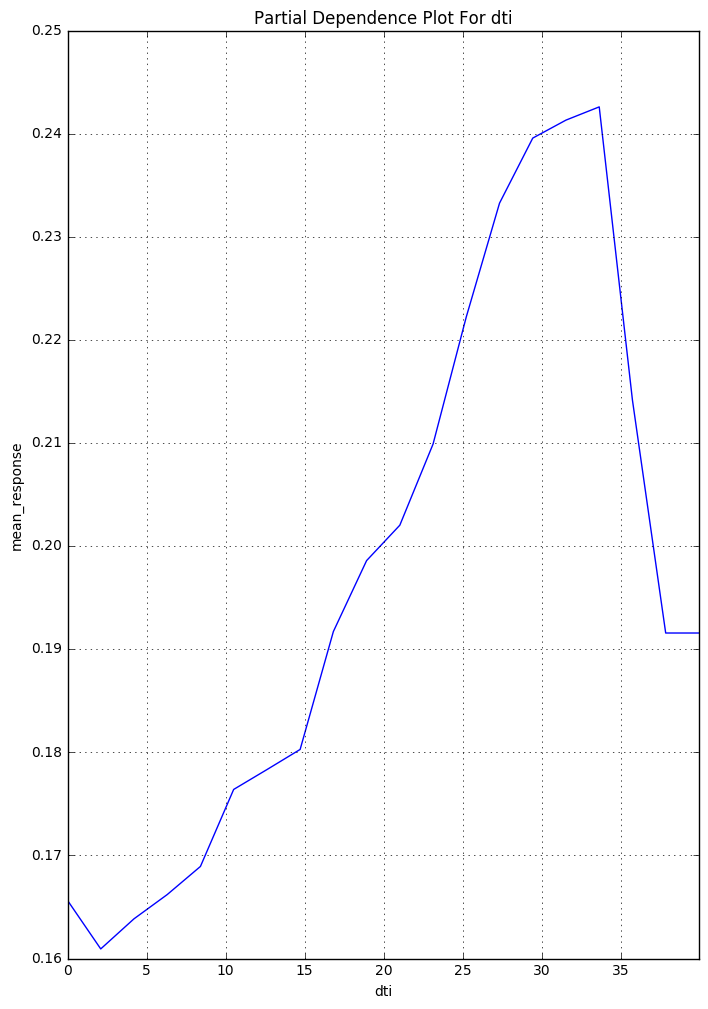

In [17]:
# partial dependence plots are a powerful machine learning interpretation tool
# to calculate partial dependence across the domain a variable
# hold column of interest at constant value
# find the mean prediction of the model with this column constant
# repeat for multiple values of the variable of interest
# h2o has a built-in function for partial dependence as well
par_dep_dti1 = gbm_model.partial_plot(data=train, cols=['dti'], server=True, plot=True)

In [18]:
# shutdown h2o
h2o.cluster().shutdown(prompt=False)

H2O session _sid_9a3b closed.
